# TMA4320 - Prosjekt 2 -  Endimensjonale modeller for atomer, molekyler og krystaller
***
Prosjekt skrevet av William Scott Grundeland Olsen, Gruppe 6. Levert inn 11.03.2019.
***
## Innholdsfortegnelse
- [Introduksjon.](#Introduksjon)
- [Importering og definisjoner.](#Importering_og_definisjoner)
- [Partikkel i boks.](#Partikkel_i_boks)
- [Atomer.](#Atomer)
- [Molekyler.](#Molekyler)
- [Krystaller.](#Krystaller)
- [Referanser.](#Referanser)
- [Kommentar.](#Kommentar)

Følgende kode gjør det mulig å nummerere likningene som brukes, og referere til dem.

In [1]:
%%javascript
MathJax.Hub.Config({
    TeX: { equationNumbers: { autoNumber: "AMS" } }
});
MathJax.Hub.Queue(
  ["resetEquationNumbers", MathJax.InputJax.TeX],
  ["PreProcess", MathJax.Hub],
  ["Reprocess", MathJax.Hub]
);

<IPython.core.display.Javascript object>

<a id='Introduksjon'></a>

## Introduksjon

Vi skal se på atomer, molekyler og krystaller i én dimensjon med ikke-vekselvirkende elektroner. Vi skal hele tiden se på reelle bølgefunksjoner, slik at det ikke er nødvendig å komplekskonjugere. Derfor unlater vi å gjøre dette.

Den tidsuavhengige Schrödingerlikningen $\hat{H}\psi(x)=E\psi(x)$ kan skrives på formen

\begin{equation}
\label{TUSL}
    -\frac{\hbar^2}{2m}\frac{\text{d}^2\psi(x)}{\text{d}x^2}+V(x)\psi(x)=E\psi(x),
\end{equation}

ettersom den kinetiske energioperatoren er gitt ved $\hat{K}=\hat{p}^2_x/(2m)$, og $\hat{p}_x=-\text{i}\hbar\partial/\partial x$. Denne likningen kan diskretiseres ved å la $\psi_n=\psi(x_n)=\psi(n\Delta x)$ og $V_n=V(x_n)$. Da kan Likning \eqref{TUSL} ta formen

\begin{equation}
\label{Diskret TUSL}
    -\frac{\hbar^2}{2m}\frac{\psi_{n+1}-2\psi_n+\psi_{n-1}}{(\Delta x)^2}+V_n\psi_n=E\psi_n,
\end{equation}

for $n=1,2,\dots,N$.

Vi lar elektronet kunne bevege seg mellom to harde vegger i $x=0$ og $x=L=(N+1)\Delta x$. Altså er $V_0=V_{N+1}=\infty$. Da er bølgefunksjonen forskjellig fra null bare i intervallet $1\leq x\leq N$. Med de $N$ differenslikningene fra Likning \eqref{Diskret TUSL} får vi systemet $\boldsymbol{\mathbf{H\psi}}=E\boldsymbol{\psi}$, med matrisen

\begin{equation}
    \mathbf{H}=\begin{bmatrix}
\xi+V_1 & -\xi/2 & & 0\\
-\xi/2 & \ddots & \ddots & \\
& \ddots & \ddots & -\xi/2 \\
0 & & -\xi/2 & \xi+V_N \end{bmatrix},
\end{equation}

med $\xi={\hbar^2}/[{m(\Delta x)^2}]$, og vektoren $\boldsymbol{\psi}=\begin{bmatrix}\psi_1 & \psi_2 & \cdots & \psi_N\end{bmatrix}^\top$. Det er kun de ikke-trivielle løsningene, $\boldsymbol{\psi}\neq\mathbf{0}$, som er interesante. Disse kan finnes ved

\begin{equation}
    \det(\mathbf{H}-E\mathbf{I})\equiv\det(\mathbf{H}-\mathbf{E})=0,
\end{equation}

der $\mathbf{I}$ er identitetsmatrisen. Egenverdiene $E_1, E_2, \dots, E_N$ med tilhørende egenvektorer $\boldsymbol{\psi}^{(1)}, \boldsymbol{\psi}^{(2)}, \dots, \boldsymbol{\psi}^{(N)}$ kan da finnes fra

\begin{equation}
    c_NE^N+c_{N-1}E^{N-1}+\cdots+c_1E+c_0=0,
\end{equation}

og deretter

\begin{equation}
    (\mathbf{H}-\mathbf{E}_j)\boldsymbol{\psi}^{(j)}=0,
\end{equation}

for $j=1,2,\dots,N$.

Normering innebærer at

\begin{equation}
    \sum_{n=1}^N\left|\psi_n^{(j)}\right|\Delta x=1,
\end{equation}

der $\Delta x$ er steglengden, og siden bølgefunksjonene er ortogonale blir

\begin{equation}
\label{Ortogonale}
    \sum_{n=1}^N\psi_n^{(i)}\psi_n^{(j)}\Delta x=\delta_{ij}.
\end{equation}

Her er $\delta_{ij}$ Kronecker-delta, definert ved

\begin{equation}
    \delta_{ij}=\begin{cases} 
      0 & \text{hvis } i\neq j, \\
      1 & \text{hvis } i = j.
   \end{cases}
\end{equation}

Dette kan også symboliseres ved at

\begin{equation}
    \boldsymbol{\Psi\Psi}^\top=\mathbf{I},
\end{equation}

der $\Psi^\top\equiv\begin{bmatrix}\boldsymbol{\psi}^{(1)} & \boldsymbol{\psi}^{(2)} & \cdots & \boldsymbol{\psi}^{(N)}\end{bmatrix}$.

Da bølgefunksjonene definerer et fullstendig sett er

\begin{equation}
\label{Fullstendig}
    \sum_{j=1}^N\psi_n^{(j)}\psi_k^{(j)}\Delta x=\delta_{nk}.
\end{equation}

En annen måte å teste om bølgefunksjonene er et fullstendig sett er at dersom de er ortonormerte, og det finnes $N$ av dem, så vil de nødvendigvis definere et fullstendig sett for $\mathbb{R}^N$.

<a id='Importering_og_definisjoner'></a>

## Importering og definisjoner

Først importerer vi de bibliotekene vi vil få bruk for i prosjektet:

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import constants
import scipy.linalg
import scipy.sparse

Under definerer vi noen konstanter vi vil få bruk for senere i koden. Alle konstantene har SI-enheter.

In [3]:
pi = np.pi
h = constants.value("Planck constant")
hbar = constants.value("Planck constant over 2 pi")
m_e = constants.value("electron mass")
e = constants.value("elementary charge")

<a id='Partikkel_i_boks'></a>

## Partikkel i boks

For en partikkel i boks har vi én uendelig dyp potensialbrønn. Det vil si at

\begin{equation}
    V(x)=\begin{cases} 
      0 & \text{hvis } 0<x<L, \\
      \infty & \text{ellers,}
   \end{cases}
\end{equation}

som i det diskrete tilfellet betyr at

\begin{equation}
    V_n=\begin{cases} 
      0 & \text{hvis } 0<n<N+1, \\
      \infty & \text{ellers.}
   \end{cases}
\end{equation}

Den tidsuavhengige Schrödingerlikningen har da formen

\begin{equation}
\label{TUSL partikkel i boks}
    -\frac{\hbar^2}{2m}\frac{\text{d}^2\psi(x)}{\text{d}x^2}=E\psi(x),
\end{equation}

og denne har analytisk løsning $\psi_i(x)=\sqrt{2/L}\sin(k_ix)$, der $k_i=i\pi/L$, og tillatte energiegenverdier er $E_i=\hbar^2k_i^2/(2m)$, for $i=1,2,\dots$. Utenfor boksen er $\psi(x)=0$. Disse analytiske løsningene skal sammenliknes med de numeriske løsningene i denne delen. Den diskretiserte versjonen av Likning \eqref{TUSL partikkel i boks} blir da

\begin{equation}
\label{Diskret TUSL partikkel i boks}
    -\frac{\hbar^2}{2m}\frac{\psi_{n+1}-2\psi_n+\psi_{n-1}}{(\Delta x)^2}=E\psi_n,
\end{equation}

for $n=1,2,\dots,N$.

Vi kan nå gå i gang med å skrive programmet for tilfellet partikkel i boks. Noen symbolforklaringer for koden er:
- `V` er potensialet,
- `N` er antall diskrete posisjonsverdier,
- `L` er lengden på intervallet $0<x<L$,
- `x` er arrayet som inneholder stegene i $x$-retning, som brukes da man skal plotte. Disse kommer fra steglengden `dx`,
- `eigen_values` er et array av energiegenverdiene i SI-enheten J,
- `eigen_vectors` er et 2D array av bølgeegenfunksjonene.

Først beregnes den reelle, symetriske og tridiagonale matrisen $\mathbf{H}\in\mathbb{R}^{N\times N}$, som symboliseres ved `main_diag` og `off_diags`. Dette gjør det mulig å beregne $E_n$ og $\psi_n$. De fire første bølgefunksjonene plottes så etterfulgt av et plott av de analytisk beregnede bølgefunksjonene. Deretter sjekkes avviket mellom energiegenverdiene til de analytiske løsningene med de numeriske løsnigene. Til slutt sjekkes det om bølgefunksjonene er ortonormerte og om de danner et fullstendig sett.

For å tilfredsstille grensebetingelsene legger vi til en rad med nuller på starten og slutten i `eigen_vectors` som også normeres ved å dividere hvert element på $\sqrt{(\Delta x)}$. I tillegg tar ikke algoritmen hensyn til om bølgefunksjonene starter i positiv $y$-retning eller negativ $y$-retning. Dette fikses ved en `for`-løkke som gjør slik at fortegnet endres, og alle starter oppover i positiv $y$-retning.

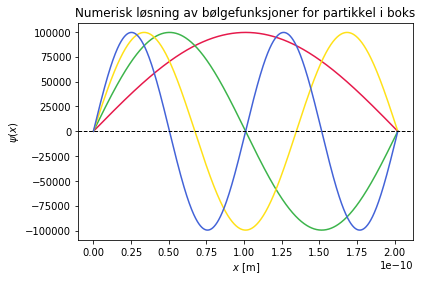

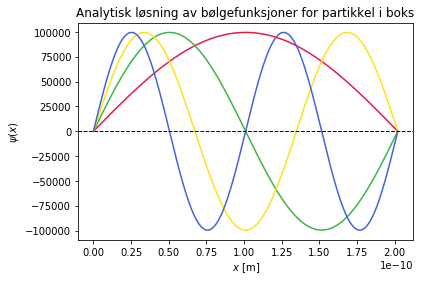

Det største relative avviket mellom numerisk beregnet energiegenverdi og analytisk beregnet energiegenverdi er 59.4 %, mens de relative avvikene for de fire første er henholdsvis 8.208e-05 %, 0.000328 %, 0.000739 % og 0.001313 %.

Alle bølgefunksjonene er normert med en absoluttkvadratverdi i intervallet (0.99999, 1.00001).

Ved matrisemultiplikasjon er bølgefunksjonene approksimativt ortogonale.

Det finnes 1000 bølgefunksjoner, og de danner da et fullstendig sett.


In [4]:
V = 0
N = 1000
L = 2.02e-10
V_list = np.array([V]*N)
dx = L / (N + 1)
x = np.array([dx * n for n in range(len(V_list) + 2)])
xi = hbar**2 / (m_e * dx**2)
main_diag = np.array([xi + v for v in V_list])
off_diags = np.array([-xi / 2 for _ in range(len(V_list) - 1)])
eigen_values, eigen_vectors = scipy.linalg.eigh_tridiagonal(main_diag, off_diags)

eigen_vectors /= np.sqrt(dx)
eigen_vectors_list = eigen_vectors.tolist()
eigen_vectors_list.append([0]*N)
eigen_vectors_list.insert(0, [0]*N)
eigen_vectors_bound = np.array(eigen_vectors_list)

for i in range(N):
    if eigen_vectors_bound[:,i][1] < 0:
        eigen_vectors_bound[:,i] = -eigen_vectors_bound[:,i]

# Plott av de numerisk beregnede bølgefunksjonene:
psi1, psi2 = eigen_vectors_bound[:,0], eigen_vectors_bound[:,1]
psi3, psi4 = eigen_vectors_bound[:,2], eigen_vectors_bound[:,3]
plt.figure("Wave functions for particle in well")
plt.plot(x, psi1, color='#e6194B')
plt.plot(x, psi2, color='#3cb44b')
plt.plot(x, psi3, color='#ffe119')
plt.plot(x, psi4, color='#4363d8')
plt.axhline(0, linewidth=1, color='k', linestyle='--')
plt.title("Numerisk løsning av bølgefunksjoner for partikkel i boks")
plt.xlabel("$x$ [m]")
plt.ylabel("$\psi(x)$")
plt.show()

# Plot av analytisk beregnede bølgefunksjoner:
plt.figure("Analytic solution for particle in well")
psi1_analytic, psi2_analytic = np.sqrt(2 / L) * np.sin(pi/L * x), np.sqrt(2 / L) * np.sin(2*pi/L * x)
psi3_analytic, psi4_analytic = np.sqrt(2 / L) * np.sin(3*pi/L * x), np.sqrt(2 / L) * np.sin(4*pi/L * x)
plt.plot(x, psi1_analytic, color='#e6194B')
plt.plot(x, psi2_analytic, color='#3cb44b')
plt.plot(x, psi3_analytic, color='#ffe119')
plt.plot(x, psi4_analytic, color='#4363d8')
plt.axhline(0, linewidth=1, color='k', linestyle='--')
plt.title("Analytisk løsning av bølgefunksjoner for partikkel i boks")
plt.xlabel("$x$ [m]")
plt.ylabel("$\psi(x)$")
plt.show()
    
# Sjekke relativt avvik i egenverdiene, analytiske og numeriske:
E_analytic = lambda j: hbar**2 * (j * pi / L)**2 / (2 * m_e)
eigen_value_diff = np.zeros(N)
for i in range(N):
    eigen_value_diff[i] += np.abs(eigen_values[i] / E_analytic(i + 1) - 1) * 100
max_eigenvalue_diff = np.amax(eigen_value_diff)
print("Det største relative avviket mellom numerisk beregnet energiegenverdi og analytisk beregnet \
energiegenverdi er {} %, mens de relative avvikene for de fire første er henholdsvis {} %, {} %, {} % og {} %.\n"\
          .format(round(max_eigenvalue_diff, 1), round(eigen_value_diff[0], 8),\
                  round(eigen_value_diff[1], 6), round(eigen_value_diff[2], 6), round(eigen_value_diff[3], 6)))
    
# Sjekke normering av bølgefunskjonene:
number_of_norm = 0
for i in range(N):
    norm = np.sum(np.abs(eigen_vectors_bound[:,i])**2 * dx)
    if norm > 0.99999 and norm < 1.00001:
        number_of_norm += 1
if number_of_norm == N:
    print("Alle bølgefunksjonene er normert med en absoluttkvadratverdi i intervallet (0.99999, 1.00001).\n")
else:
    print("Alle bølgefunksjonene er ikke normert med en absoluttkvadratverdi i intervallet (0.99999, 1.00001).\n")

# Sjekke ortogonalitet av bølgefunksjonene:
matrix_mult = dx * eigen_vectors @ eigen_vectors.T
if np.allclose(matrix_mult, np.identity(N)):
    print("Ved matrisemultiplikasjon er bølgefunksjonene approksimativt ortogonale.\n")
else:
    print("Ved matrisemultiplikasjon er ikke bølgefunksjonene approksimativt ortogonale.\n")

# Sjekke fullstendig sett av bølgefunksjonene:
if len(eigen_vectors) == N or len(eigen_vectors) > N:
    print("Det finnes {} bølgefunksjoner, og de danner da et fullstendig sett.".format(len(eigen_vectors)))
else:
    print("Det finnes ikke {} bølgefunksjoner, og de danner da ikke et fullstendig sett.".format(N))

Fra analysen over er det klart at de numerisk beregnede løsningene sammenfaller med de analytiske resultatene. Det vises at innenfor intervallet $(0.99999, 1.00001)$ er bølgefunksjonene normerte. Ved bruk av at

\begin{equation}
    \begin{bmatrix} \boldsymbol{\psi}^{(1)} \\ \boldsymbol{\psi}^{(2)} \\ \vdots \\ \boldsymbol{\psi}^{(N)} \end{bmatrix} \begin{bmatrix} \boldsymbol{\psi}^{(1)} & \boldsymbol{\psi}^{(2)} & \cdots & \boldsymbol{\psi}^{(N)} \end{bmatrix} \approx \mathbf{I},
\end{equation}

der $\mathbf{I}$ symboliserer identitetsmatrisen, finner vi at bølgefunksjonene også er ortogonale. Dette blir vist innenfor en absoluttoleranse på $10^{-8}$. Bølgefunksjonene danner da et fullstendig sett, hvis det er $N$ stykker av dem, som vi finner at stemmer. I tillegg er de fire første bølgeegenfunksjonene plottet, og vi ser kvalitativt at de numerisk beregnede bølgefunksjonene sammenfaller med de analytiske bølgefunksjonene.

<a id='Atomer'></a>

## Atomer

Atomet modeleres som én endelig potensialbrønn. Da vil potensialet være gitt ved

\begin{equation}
    V(x)\begin{cases} 
      V_0 & \text{hvis } 0<x<L, \\
      0 & \text{ellers,}
   \end{cases}
\end{equation}

som kan diskretiseres til

\begin{equation}
    V_n=\begin{cases} 
      V_0 & \text{hvis } 0<n<N+1, \\
      0 & \text{ellers.}
   \end{cases}
\end{equation}

I dette tilfellet er energiegenverdiene gitt implisitt ved

\begin{equation}
\label{Energi i atom}
    \tan\left(\frac{\sqrt{2mL^2E}}{\hbar}\right)=\begin{cases} 
      \sqrt{(V_0-E)/E} & \text{for symmetriske } \psi, \\
      -\sqrt{E/(V_0-E)} & \text{for anti-symmetriske } \psi,
   \end{cases}
\end{equation}

for $E<V_0$. For $E>V_0$ er energien $E$ kontinuerlig.

Man kan videre sammenlikne bølgelengden for de analytiske løsningene og de numeriske løsningene. Dette kan gjøres ved at

\begin{equation}
\label{Bølgelengde}
    \lambda = \frac{h}{\sqrt{2m_\text{e}K}}
\end{equation}

der $h$ er Plancks konstant, $m_\text{e}$ er elektronets masse og $K$ er den kinetiske energien.

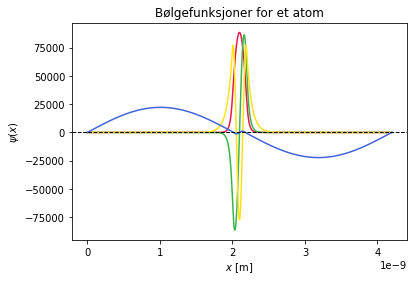

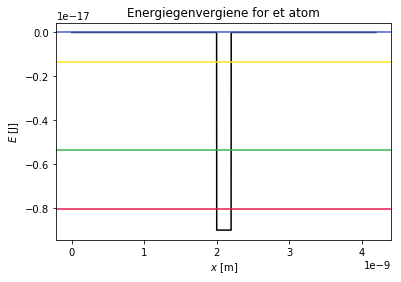

De fire første numerisk beregnede energiegenverdiene er:
-50.29158590262264 eV
-33.27542446550528 eV
-8.381980635347606 eV
0.09216434673597351 eV


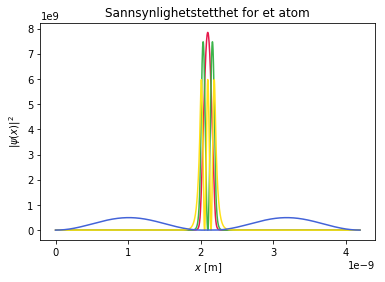

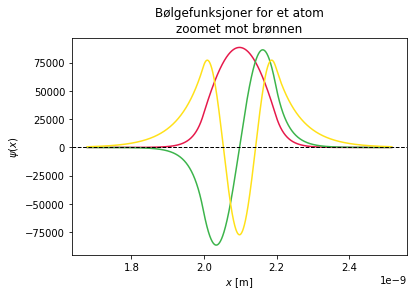

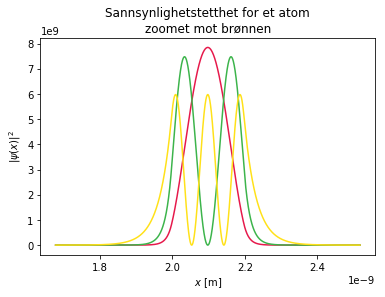

In [5]:
V = -9.0e-18
N = 1000
L = 2.0e-10
V_list = np.array([0]*10*N + [V]*N + [0]*10*N)
dx = L / (N + 1)
x = np.array([dx * n for n in range(len(V_list))])
xi = hbar**2 / (m_e * dx**2)
main_diag = np.array([xi + v for v in V_list])
off_diags = np.array([-xi / 2 for _ in range(len(V_list) - 1)])
eigen_values, eigen_vectors = scipy.linalg.eigh_tridiagonal(main_diag, off_diags)
eigen_vectors /= np.sqrt(dx)
eigen_values_eV = eigen_values / e

# Plott av de numerisk beregnede bølgefunksjonene:
plt.figure("Wave functions for atom")
plt.plot(x, eigen_vectors[:,0], color='#e6194B')
plt.plot(x, eigen_vectors[:,1], color='#3cb44b')
plt.plot(x, eigen_vectors[:,2], color='#ffe119')
plt.plot(x, eigen_vectors[:,3], color='#4363d8')
plt.axhline(0, linewidth=1, color='k', linestyle='--')
plt.title("Bølgefunksjoner for et atom")
plt.xlabel("$x$ [m]")
plt.ylabel("$\psi(x)$")
plt.show()

# Plott av energiegenverdiene:
plt.figure("Energy eigenvalues for atom")
plt.plot(x, V_list, color='k')
plt.axhline(y=eigen_values[0], color='#e6194B')
plt.axhline(y=eigen_values[1], color='#3cb44b')
plt.axhline(y=eigen_values[2], color='#ffe119')
plt.axhline(y=eigen_values[3], color='#4363d8')
plt.title("Energiegenvergiene for et atom")
plt.xlabel("$x$ [m]")
plt.ylabel("$E$ [J]")
plt.show()

print("De fire første numerisk beregnede energiegenverdiene er:")
E1J, E2J, E3J, E4J = eigen_values[0], eigen_values[1], eigen_values[2], eigen_values[3]
E1, E2, E3, E4 = eigen_values_eV[0], eigen_values_eV[1], eigen_values_eV[2], eigen_values_eV[3]
print("{} eV\n{} eV\n{} eV\n{} eV".format(E1, E2, E3, E4))

# Plott av sannsynlighetstettheten til bølgefunksjonene:
plt.figure("Probability density for atom")
plt.plot(x, np.abs(eigen_vectors[:,0])**2, color='#e6194B')
plt.plot(x, np.abs(eigen_vectors[:,1])**2, color='#3cb44b')
plt.plot(x, np.abs(eigen_vectors[:,2])**2, color='#ffe119')
plt.plot(x, np.abs(eigen_vectors[:,3])**2, color='#4363d8')    
plt.title("Sannsynlighetstetthet for et atom")
plt.xlabel("$x$ [m]")
plt.ylabel("$|\psi(x)|^2$")
plt.show()

# Plott for å se bølgefunksjonene bedre:
_, _, center, _, _ = np.split(x, 5)
_, _, center1, _, _ = np.split(eigen_vectors[:,0], 5)
_, _, center2, _, _ = np.split(eigen_vectors[:,1], 5)
_, _, center3, _, _ = np.split(eigen_vectors[:,2], 5)
plt.figure("Wave functions for atom zoomed to the well")
plt.plot(center, center1, color='#e6194B')
plt.plot(center, center2, color='#3cb44b')
plt.plot(center, center3, color='#ffe119')
plt.axhline(0, linewidth=1, color='k', linestyle='--')
plt.title("Bølgefunksjoner for et atom\nzoomet mot brønnen")
plt.xlabel("$x$ [m]")
plt.ylabel("$\psi(x)$")
plt.show()

plt.figure("Probability density for atom zoomed to the well")
plt.plot(center, np.abs(center1)**2, color='#e6194B')
plt.plot(center, np.abs(center2)**2, color='#3cb44b')
plt.plot(center, np.abs(center3)**2, color='#ffe119')   
plt.title("Sannsynlighetstetthet for et atom\nzoomet mot brønnen")
plt.xlabel("$x$ [m]")
plt.ylabel("$|\psi(x)|^2$")
plt.show()

**Oppgave 2a):** Fra plottene over ser vi at et potensial $V=-9.0\cdot 10^{-18}\text{ J}=-56.1\text{ eV}$ gir tre bundne tilstander, sammen med brønnbredden $w=0.20 \text{ nm}$. Ved å kvalitativt se på grafene over er det klart at sannsynlighetstetthetene er symmetriske om sentrum av brønnen. Videre ser man fra plottet av bølgefunksjonene at de er vekslende symmetriske og antisymmetriske, som forventet. Det er klart at $\psi_1(x)$ og $\psi_3(x)$ er symmetriske om sentrum av brønnen, mens $\psi_2(x)$ og $\psi_4(x)$ er antisymmetriske. De to siste grafene er zoomet inn mot brønnen slik at området på 10 ganger bredden av brønnen på hver side ikke plottes fullstendig. Dette gjør det enklere å se symmetriegenskapene til $\psi_i(x)$ for $i=1,2,3$, mens for $\psi_4(x)$, som er en ubunden tilstand i motsetning til de tre første kan man se disse egenskapene i de to første plottet. Det midterste plottet viser energiegenverdiene plottet sammen med brønnen langs hele dens utstrekning. Man kan da kvalitativt se at det er tre bundne tilstander. Dette kan man også se ved å printe de numeriske verdiene for de første fire energiegenverdiene som også er gjort. At de tre første er negative viser at de er bundne tilstander.

Ved å bruke Likning \eqref{Energi i atom} med symmetrisk tilfelle for $E_1$ og $E_3$, og antisymmetrisk tilfelle for $E_2$, kan vi sammenlikne numerisk løsning og analytisk forventet verdi av energiegenverdiene. Vi må også ta hensyn til at $E<0$ i vårt tilfelle, slik at vi ikke får imaginære løsninger. Med de numeriske beregnede energiverdiene vi fant tidligere får vi da for henholdsvis `E1`, `E2` og `E3` at differansen mellom venstre og høyre side i Likning \eqref{Energi i atom} i absoluttverdi er:

In [6]:
E_analytic = lambda t: np.tan(np.sqrt(-2 * m_e * L**2 * t) / hbar)
E_symmetric = lambda t: np.sqrt((V + t) / t)
E_antisymmetric = lambda t: -np.sqrt(t / (V + t))
print(np.abs(E_analytic(E1J) - E_symmetric(E1J)))
print(np.abs(E_analytic(E2J) - E_antisymmetric(E2J)))
print(np.abs(E_analytic(E3J) - E_symmetric(E3J)))

0.04622296503477519
0.21906182368649563
2.952116788330867


Den analytiske differansen skal som vist i Likning \eqref{Energi i atom} være lik null, og det er da klart at avviket fra analytisk løsning øker jo lenger opp i potensialbrønnen man kommer.

I det klassisk tillatte området får vi bølgelengde gitt av Likning \eqref{Bølgelengde}, og de bundne tilstandene vil da for $E_1$, $E_2$ og $E_3$ ha verdiene gitt ved henholdsvis:

In [7]:
print(h / (np.sqrt(4 * m_e * np.abs(E1J))), 'm')
print(h / (np.sqrt(4 * m_e * np.abs(E2J))), 'm')
print(h / (np.sqrt(4 * m_e * np.abs(E3J))), 'm')

1.2228654405835712e-10 m
1.5033653455431722e-10 m
2.995387481721731e-10 m


Dette svarer til $\lambda_1\approx 0.122\text{ nm}$, $\lambda_2\approx 0.150\text{ nm}$ og $\lambda_3\approx 0.300\text{ nm}$. Ved å analysere figuren plottet over ser man at bølgelengden til grunntilstanden er omtrent lik halve lengden av brønnen, bølgelengden til første eksiterte tillstand er omtrent lik lengden til brønnen og bølgelengden til andre eksiterte tilstand er omtrent lik 3/2 ganger lengden til brønnen. Da lengden på brønnen er $0.20\text{ nm}$ ser vi at det stemmer noenlunde. Dette er approksimative bølgelengder vi får fra grafene, da vi for eksempel ser at grunntilstandens bølgefunksjon vil fortsette litt ut i det klassisk forbudte området, slik at dens sanne bølgelengde blir større. Om vi derimot antar at approksimasjonene gjelder, så stemmer det best for andre eksiterte tilstand, og vi har følgende relative avvik:

| Tilstand | Grunntilstanden | Første eksiterte tilstand | Andre eksiterte tilstand |
| --- | --- | --- | --- |
| **Relativ feil** | 22 % | 25 % | 0.0 % |

Koden under gir et perspektiv på energiegenverdiene utenfor potensialbrønnen:

In [8]:
differ = np.inf
for i in range(4, len(eigen_values) - 1):
    if np.abs(eigen_values[i] - eigen_values[i + 1]) < differ:
        differ = np.abs(eigen_values[i] - eigen_values[i + 1])
print(differ / e, "eV")

4.4242241822343806e-06 eV


Vi ser fra koden over at den største energiforskjellen mellom to påfølgende energinivå er omtrent $4.42\,\mu\text{eV}$. Dette er en liten verdi i forhold til differansen mellom to bundne energinivå, hvor den minste av disse er omtrent $17.2 \text{ eV}$. Altså er differansen mellom to bundne energinivå av størrelsesorden $10^6$ ganger energiforskjellen mellom to påfølgende ubundne energinivå. Dette medfører at vi kan si at det er et kvasikontinuerlig spekter av ubundne tilstander hvor avstanden mellom påfølgende energinivå er veldig lav.

Ved å for eksempel ta utgangspunkt i energiegenverdien $E_{10}=1.472\text{ eV}$, som kan finnes ved å kalle `eigen_values[9]`, kan vi sammenlikne med analytiske tilfeller. Dette svarer til en kinetisk energi på

\begin{equation}
    K_{10}=\begin{cases}
            E_{10} + |V| = 57.65\text{ eV} & \text{hvis elektronet er i brønnområdet}, \\
            E_{10} = 1.472\text{ eV} & \text{hvis elektronet er utenfor brønnområdet}.
    \end{cases}
\end{equation}

Dette vil så svare til en bølgelengde

\begin{equation}
    \lambda_{10}=\begin{cases}
            0.162\text{ nm} & \text{hvis elektronet er i brønnområdet}, \\
            1.01\text{ nm} & \text{hvis elektronet er utenfor brønnområdet}.
    \end{cases}
\end{equation}

For å teste om dette stemmer kan vi for eksempel plotte bølgefunksjonen som korresponderer til $E_{10}$, nemlig $\psi_{10}(x)$, og måle en approksimativ verdi for bølgelengden $\lambda_{10}$.

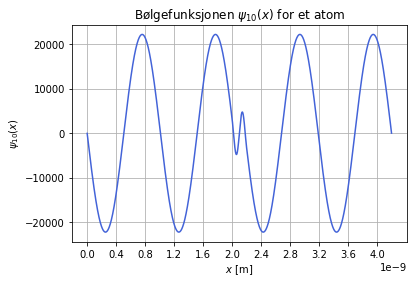

In [9]:
plt.figure("Wave functions for atom psi10")
plt.plot(x, eigen_vectors[:,9], color='#4363d8')
plt.title("Bølgefunksjonen $\psi_{10}(x)$ for et atom")
plt.xlabel("$x$ [m]")
plt.ylabel("$\psi_{10}(x)$")
plt.grid(True)
plt.xticks(np.arange(np.amin(x), np.amax(x), 0.04e-8))
plt.show()

Fra plottet over er det enkelt å se at bølgelengden i området utenfor brønnen er omtrent $1\text{ nm}$, som stemmer fint overens med de numeriske beregningene. Hvis elektronet er innenfor brønnområdet ser vi at bølgelengden approksimativt vil være $2\cdot 0.1\text{ nm}=0.2\text{ nm}$. Dette passer også godt med de numeriske verdiene. Vi kan da konkludere med at bølgelengdene til $\psi_{10}(x)$ er i samsvar med elektronets kinetiske energi både i og utenfor brønnområdet.

**Oppgave 2b):** Dersom vi antar at modellen over skal beskrive atomer med flere ikke-vekselvirende elektroner vil atomnummer én til seks være aktuelle med tre bundne tilstander. Dette kommer fra pauliprinsippet som sier at to elektroner, med hvert sitt spinn, kan oppta samme orbital. Dermed kan det være to elektroner i hver bundne tilstand, og med tre bundne tilstander blir dette til sammen seks. Det trenger dog ikke å fylles opp to elektroner i hver orbital, slik at det kan også være én. Grunnen til at det da blir atomnummer én til seks er at $n$ elektroner tilsvarer $n$ protoner, og dermed atomnummer $n$, gitt at vi ikke tenker på muligheten for ion. Dersom vi skulle hatt mer enn seks elektroner, ville de siste elektronene etter nummer seks ikke kunne finnes i en bunden tilstand, og vi ville fått et ion. Dermed vil det maksimalt være mulig med atomnummer seks om dette skal beskrive et atom.

For atomnummer 1, 3 og 5 blir det totale spinnet i grunntilstanden $\pm 1/2$. Dette er siden et elektron har spinn $m_\text{e}=\pm 1/2$, og i hver bundne tilstand kan det være to elektroner av motsatt spinn. For atomnummer 1 er det kun ett elektron, som kan ha spinn enten $1/2$ eller $-1/2$, og tilsvarende blir det for atomnummer 3 og 5, bare at det ene eletronet ligger i en høyere bunden tilstand. Fra dette argumentet kan vi også konkludere med at for atomnummer 2, 4 og 6 er det totale spinnet lik 0, da spinnene i de bundne tilstandene som har to elektroner kansellerer hverandre.

<a id='Molekyler'></a>

## Molekyler

Et homonukleært to-atomisk molekyl kan moddeleres som to potensialbrønner adskilt av en potensialbarriære. I denne oppgaven og oppgaven om krystaller senere har jeg valgt å la bredden på potensialbarrieren være lik bredden av potensialbrønnen. Vi får da følgende resultater:

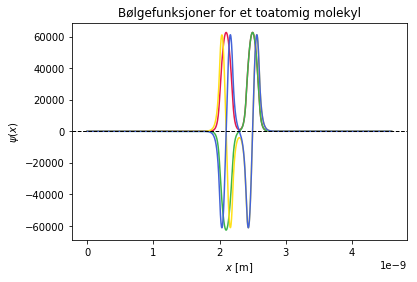

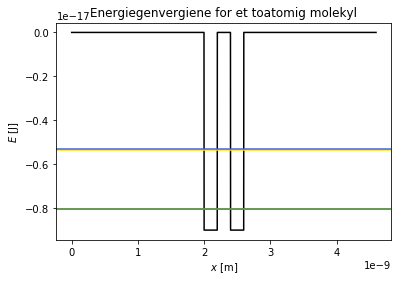

De fire første energiegenverdiene er:
-50.29318736404807 eV
-50.289985255451704 eV
-33.29411283141176 eV
-33.256681711670446 eV


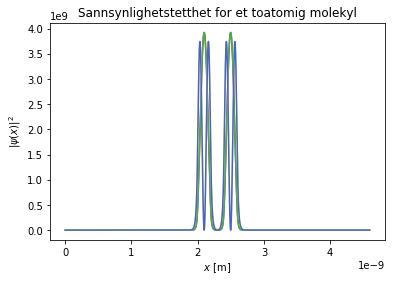

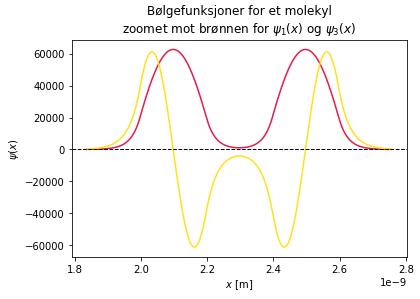

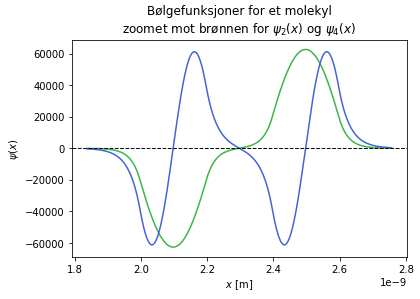

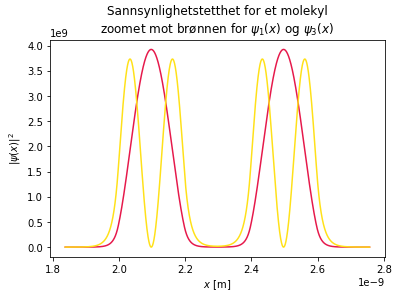

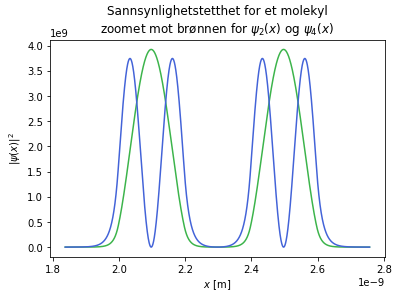

In [10]:
V = -9.0e-18
N = 1000
L = 2.0e-10
V_list = np.array([0]*10*N + [V]*N + [0]*N + [V]*N + [0]*10*N)
dx = L / (N + 1)
x = np.array([dx * n for n in range(len(V_list))])
xi = hbar**2 / (m_e * dx**2)
main_diag = np.array([xi + v for v in V_list])
off_diags = np.array([-xi / 2 for _ in range(len(V_list) - 1)])
eigen_values, eigen_vectors = scipy.linalg.eigh_tridiagonal(main_diag, off_diags)
eigen_vectors /= np.sqrt(dx)

# Plott av de numerisk beregnede bølgefunksjonene:
plt.figure("Wave functions for diatomic molecules")
plt.plot(x, eigen_vectors[:,0], color='#e6194B')
plt.plot(x, eigen_vectors[:,1], color='#3cb44b')
plt.plot(x, eigen_vectors[:,2], color='#ffe119')
plt.plot(x, eigen_vectors[:,3], color='#4363d8')
plt.axhline(0, linewidth=1, color='k', linestyle='--')
plt.title("Bølgefunksjoner for et toatomig molekyl")
plt.xlabel("$x$ [m]")
plt.ylabel("$\psi(x)$")
plt.show()

# Plott av energiegenverdiene:
E1, E2, E3, E4 = eigen_values[0], eigen_values[1], eigen_values[2], eigen_values[3]

plt.figure("Energy eigenvalues for diatomic molecules")
plt.plot(x, V_list, color='k')
plt.axhline(y=E1, color='#e6194B')
plt.axhline(y=E2, color='#3cb44b')
plt.axhline(y=E3, color='#ffe119')
plt.axhline(y=E4, color='#4363d8')
plt.title("Energiegenvergiene for et toatomig molekyl")
plt.xlabel("$x$ [m]")
plt.ylabel("$E$ [J]")
plt.show()

print("De fire første energiegenverdiene er:")
print("{} eV\n{} eV\n{} eV\n{} eV".format(E1 / e, E2 / e, E3 / e, E4 / e))

# Plott av sannsynlighetstettheten til bølgefunksjonene:
plt.figure("Probability density for diatomic molecules")
plt.plot(x, np.abs(eigen_vectors[:,0])**2, color='#e6194B')
plt.plot(x, np.abs(eigen_vectors[:,1])**2, color='#3cb44b')
plt.plot(x, np.abs(eigen_vectors[:,2])**2, color='#ffe119')
plt.plot(x, np.abs(eigen_vectors[:,3])**2, color='#4363d8')    
plt.title("Sannsynlighetstetthet for et toatomig molekyl")
plt.xlabel("$x$ [m]")
plt.ylabel("$|\psi(x)|^2$")
plt.show()

# Plott for å se bølgefunksjonene bedre:
_, _, center, _, _ = np.split(x, 5)
_, _, center1, _, _ = np.split(eigen_vectors[:,0], 5)
_, _, center2, _, _ = np.split(eigen_vectors[:,1], 5)
_, _, center3, _, _ = np.split(eigen_vectors[:,2], 5)
_, _, center4, _, _ = np.split(eigen_vectors[:,3], 5)

plt.figure("Wave functions for molecule zoomed to the well for psi1 and psi3")
plt.plot(center, center1, color='#e6194B')
plt.plot(center, center3, color='#ffe119')
plt.axhline(0, linewidth=1, color='k', linestyle='--')
plt.title("Bølgefunksjoner for et molekyl\nzoomet mot brønnen for $\psi_1(x)$ og $\psi_3(x)$")
plt.xlabel("$x$ [m]")
plt.ylabel("$\psi(x)$")
plt.show()

plt.figure("Wave functions for molecule zoomed to the well for psi2 and psi4")
plt.plot(center, center2, color='#3cb44b')
plt.plot(center, center4, color='#4363d8')
plt.axhline(0, linewidth=1, color='k', linestyle='--')
plt.title("Bølgefunksjoner for et molekyl\nzoomet mot brønnen for $\psi_2(x)$ og $\psi_4(x)$")
plt.xlabel("$x$ [m]")
plt.ylabel("$\psi(x)$")
plt.show()

plt.figure("Probability density for molecule zoomed to the well for psi1 and psi3")
plt.plot(center, np.abs(center1)**2, color='#e6194B')
plt.plot(center, np.abs(center3)**2, color='#ffe119')
plt.title("Sannsynlighetstetthet for et molekyl\nzoomet mot brønnen for $\psi_1(x)$ og $\psi_3(x)$")
plt.xlabel("$x$ [m]")
plt.ylabel("$|\psi(x)|^2$")
plt.show()

plt.figure("Probability density for molecule zoomed to the well for psi2 and psi4")
plt.plot(center, np.abs(center2)**2, color='#3cb44b')
plt.plot(center, np.abs(center4)**2, color='#4363d8')
plt.title("Sannsynlighetstetthet for et molekyl\nzoomet mot brønnen for $\psi_2(x)$ og $\psi_4(x)$")
plt.xlabel("$x$ [m]")
plt.ylabel("$|\psi(x)|^2$")
plt.show()

Ved å se på symmetriske og antisymmetriske bølgefunksjoner ser vi at det kvalitativt stemmer overens med de forventede resultatene. Grafen for sannsynlighetstettheten er også symmetrisk om midten av barrieren. Jeg har tatt med de fire nederste figurene for å vise dette klarere, der det er zoomet inn mot brønnen. Symmetrien kommer da klarere frem. I plottet av energiegenverdiene er det vanskelig å se at det er plottet fire energiverdier, da de to og to ligger veldig tett. Det er derfor også skrevet ut de fire første energiegenverdiene under plottet, som viser at de to og to ligger veldig tett. Dette gjelder også for plottet av sannsynlighetstettheten. Slik at de to symmetriske og de to antisymmetriske bølgefunksjonene plottet separat i de zoomede versjonene. Da unngår man overlapp, og det blir enklere å se symmetriegenskapene til bølgefunksjonene og til absoluttkvadratet av bølgefunksjonene.

Dersom vi tenker oss $\text H_2$ og $\text{He}_2$ er det klart at i bindingen i $\text H_2$ er det to elektroner, mens i bindingen til $\text{He}_2$ er det fire. Grunnet Pauliprinsippet vil det da være elektroner i én bunden tilstand for $\text H_2$ og det vil være elektroner i to bundne tilstander for $\text{He}_2$. Vi finner da energiegenverdiene for hver av de to, hennholdsvis $\text{H}_2$ og $\text{He}_2$, for tilfellet med dobbelbrønn til å være:

In [11]:
print("E1 =", 2 * eigen_values[0] / e, 'eV')
print("E2 =", 2 * eigen_values[1] / e, 'eV')

E1 = -100.58637472809615 eV
E2 = -100.57997051090341 eV


For to enkeltbrønner har vi fra tidligere at

In [12]:
print("E1 =", -2 * 50.29158590262264, 'eV')
print("E2 =", -2 * 33.27542446550528, 'eV')

E1 = -100.58317180524529 eV
E2 = -66.55084893101056 eV


Bindingsenergien for henholdsvis $\text H_2$ og $\text{He}_2$ blir da $\Delta E_1 = 3.20\text{ meV}$ og $\Delta E_2 = 34.0\text{ eV}$. Det gir mening at bindingsenergien til $\text{H}_2$ er mindre enn bindingsenergien til $\text{He}_2$. Dette kan illustreres med figuren under. Vi kan tenke oss at de blå strekene er energinivået til et enkelt $\text X$-atom, hvor $\text X$ i vårt tilfelle enten er $\text H$ eller $\text{He}$. Når disse binder seg sammen og danner $\text X_2$ får vi to nye energinivå, de to røde. Disse har forskjellig energi, og den nederste har minst. I tilfellet for $\text H_2$ har den to elektroner. Disse to elektronene får da plass i den laveste energitilstanden på grunn av pauliprinsippet. For $\text{He}_2$ derimot er det fire elektroner, som ikke alle kan få plass i den laveste energitilstanden. Da gjenstår det to elektroner som plasseres i det andre energinivået vist i figuren under. Det er da klart at dette krever mer energi, og derfor er bindingsenergien til $\text{He}_2$ større enn for $\text H_2$.

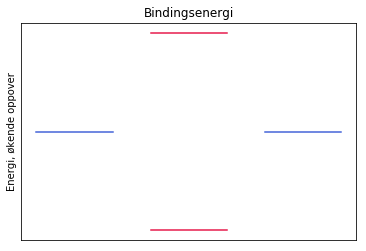

In [13]:
z = np.array([i for i in range(6)])
plt.figure("Binding energy")
plt.plot([2, 3], [1, 1], color='#e6194B')
plt.plot([0.5, 1.5], [2, 2], color='#4363d8')
plt.plot([3.5, 4.5], [2, 2], color='#4363d8')
plt.plot([2, 3], [3, 3], color='#e6194B')
plt.ylabel("Energi, økende oppover")
plt.xticks([])
plt.yticks([])
plt.title("Bindingsenergi")
plt.show()

<a id='Krystaller'></a>

## Krystaller

In [14]:
def crystal(Nw):
    V = -9.0e-18
    N = 50
    L = 2.02e-10
    V_l = [0]*10*N + [V]*N
    for _ in range(Nw - 1):
        V_l += [0]*N + [V]*N
    V_list = np.array(V_l + [0]*10*N)
    dx = L / (N + 1)
    x = np.array([dx * n for n in range(len(V_list))])
    xi = hbar**2 / (m_e * dx**2)
    main_diag = np.array([xi + v for v in V_list])
    off_diags = np.array([-xi / 2 for _ in range(len(V_list) - 1)])
    eigen_values, eigen_vectors = scipy.linalg.eigh_tridiagonal(main_diag, off_diags)
    eigen_vectors /= np.sqrt(dx)
    return eigen_vectors, eigen_values, x, V_list

**Oppgave 4a):** Ved å se på $N_w=5$, $N_w=10$ og $N_w=50$ kan vi telle antallet energinivå omkring hvert atomære energinivå. Vi tar kun med de $15=3N_w$ første, da det kun er disse som er bundne tilstander.

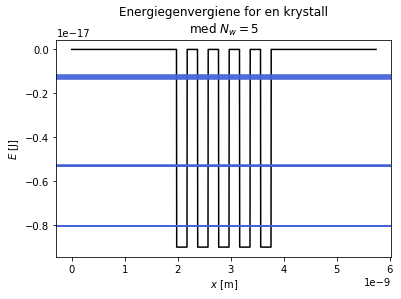

In [15]:
_, eigen_values, x, V_list = crystal(5)

# Plott av energiegenverdiene:
plt.figure("Energy eigenvalues for crystal with Nw = 5")
plt.plot(x, V_list, color='k')
for i in range(15):
    plt.axhline(y=eigen_values[i], color='#4363d8')
plt.title("Energiegenvergiene for en krystall\nmed $N_w=5$")
plt.xlabel("$x$ [m]")
plt.ylabel("$E$ [J]")
plt.show()

Igjen ser vi at de ligger veldig tett. Vi printer dem for å se hvor de ligger:

In [16]:
for i in range(15):
    print("Energiegenverdi", i + 1, "er", eigen_values[i] / e, "eV")

Energiegenverdi 1 er -50.220135357855874 eV
Energiegenverdi 2 er -50.218846498114985 eV
Energiegenverdi 3 er -50.2170851864569 eV
Energiegenverdi 4 er -50.21532306991417 eV
Energiegenverdi 5 er -50.21403260039356 eV
Energiegenverdi 6 er -33.04027055443305 eV
Energiegenverdi 7 er -33.02533428894696 eV
Energiegenverdi 8 er -33.004859339175866 eV
Energiegenverdi 9 er -32.98430087610408 eV
Energiegenverdi 10 er -32.9691975765819 eV
Energiegenverdi 11 er -8.444956832950606 eV
Energiegenverdi 12 er -8.233602802258526 eV
Energiegenverdi 13 er -7.923528937229773 eV
Energiegenverdi 14 er -7.583318978903754 eV
Energiegenverdi 15 er -7.3103330817795 eV


Vi kan da se at fem og fem energiegenverdier ligger veldig tett. For $N_w=5$ er da antallet energinivå omkring hvert atomære energinivå lik $5=N_w$. Vi tester så med $N_w=10$, og da får vi plottet:

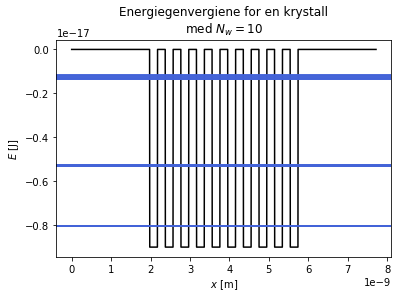

In [17]:
_, eigen_values, x, V_list = crystal(10)

# Plott av energiegenverdiene:
plt.figure("Energy eigenvalues for crystal with Nw = 10")
plt.plot(x, V_list, color='k')
for i in range(30):
    plt.axhline(y=eigen_values[i], color='#4363d8')
plt.title("Energiegenvergiene for en krystall\nmed $N_w=10$")
plt.xlabel("$x$ [m]")
plt.ylabel("$E$ [J]")
plt.show()

Igjen her ser vi at de deles inn i tre områder som for $N_w=5$, bare her har vi plottet de 30 første energiegenverdiene kontra de 15 første for $N_w=10$. Det er da klart fra plottet at ti og ti egenverdier ligger veldig tett. For $N_w=10$ er da antallet energinivå omkring hvert atomære energinivå lik $10=N_w$. Ved å gjenta for $N_w=50$ får vi samme konklusjon:

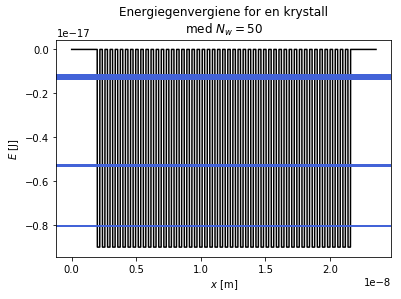

In [18]:
_, eigen_values, x, V_list = crystal(50)

# Plott av energiegenverdiene:
plt.figure("Energy eigenvalues for crystal with Nw = 50")
plt.plot(x, V_list, color='k')
for i in range(150):
    plt.axhline(y=eigen_values[i], color='#4363d8')
plt.title("Energiegenvergiene for en krystall\nmed $N_w=50$")
plt.xlabel("$x$ [m]")
plt.ylabel("$E$ [J]")
plt.show()

Det er da fornuftig å anta at for et molekyl med $N_w$ atomer så er det $N_w$ energinivåer omkring hvert atomære energinivå. Siden det er tre energibånd er det da $3N_w$ bundne tilstander totalt.

**Oppgave 4b):** Vi ittererer og lager en liste med båndbreddene for $N_w\in\mathbb{Z}:2\leq N_w\leq 100$, som vist i koden under:

In [19]:
band_width1 = np.zeros(99)
band_width2 = np.zeros(99)
band_width3 = np.zeros(99)
Nw_list = np.zeros(99)
for i in range(2, 101):
    _, eigen_values, _, V_list = crystal(i)
    diff1 = eigen_values[i - 1] - eigen_values[0]
    diff2 = eigen_values[2 * i - 1] - eigen_values[i]
    diff3 = eigen_values[3 * i - 1] - eigen_values[2 * i]
    band_width1[i - 2] += diff1
    band_width2[i - 2] += diff2
    band_width3[i - 2] += diff3
    Nw_list[i - 2] += i

Vi plotter så båndbredden, $B_i$, for $i=1,2,3$, som funksjon av antallet, $N_w$, atomer. Med båndbredden i enheten elektronvolt gir dette følgende grafer for henholdsvis båndet med lavest energi, det mellomste båndet og båndet med høyest energi:

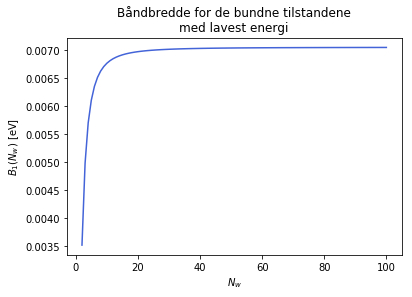

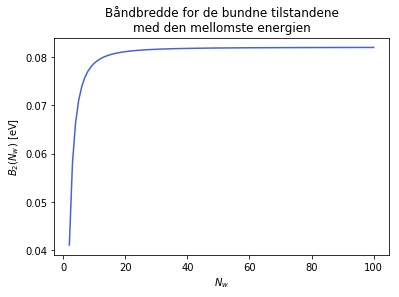

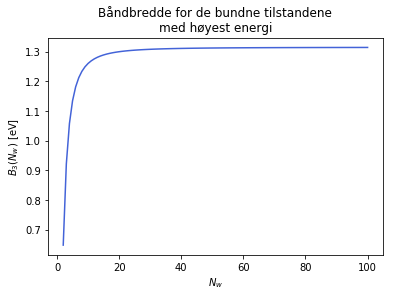

In [20]:
band_width1_eV = band_width1 / e
plt.figure("Band width1")
plt.plot(Nw_list, band_width1_eV, color='#4363d8')
plt.title("Båndbredde for de bundne tilstandene\nmed lavest energi")
plt.xlabel("$N_w$")
plt.ylabel("$B_{1}(N_w)$ [eV]")
plt.show()

band_width2_eV = band_width2 / e
plt.figure("Band width2")
plt.plot(Nw_list, band_width2_eV, color='#4363d8')
plt.title("Båndbredde for de bundne tilstandene\nmed den mellomste energien")
plt.xlabel("$N_w$")
plt.ylabel("$B_{2}(N_w)$ [eV]")
plt.show()

band_width3_eV = band_width3 / e
plt.figure("Band width3")
plt.plot(Nw_list, band_width3_eV, color='#4363d8')
plt.title("Båndbredde for de bundne tilstandene\nmed høyest energi")
plt.xlabel("$N_w$")
plt.ylabel("$B_{3}(N_w)$ [eV]")
plt.show()

Det er klart at alle tre har samme kvalitative form, og vi ser at båndbredden vokser raskt i det omtrentlige området $2\leq N_w\leq 10$, og så avtar stigningstallet etter det. Ved å kalle `band_width1_eV[98]` finner vi at $B_{1}(100)\approx 7.04\text{ meV}$. Med tanke på at stigningstallet holdt seg nær null fra omtrent $N_w=30$ til $N_w=100$ er det rimelig å anta at båndbredden for de laveste energiegenverdiene konvergerer mot omtrent $7.04\text{ meV}$. Tilsvarende for de to andre så er $B_{2}(100)\approx 82.0\text{ meV}$ og $B_{3}(100)\approx 1.31\text{ eV}$. Dermed er det av samme grunn som for $B_1$ fornuftig å anta at båndbredden for de mellomste energiegenverdiene konvergerer mot omtrent $82.0\text{ meV}$ og at båndbredden for de høyeste energiegenverdiene konvergerer mot omtrent $1.31\text{ eV}$.

**Oppgave 4c):** Vi antar at hvert atom har fire elektroner, slik at krystallen har $4N_w$ elektroner. Pauliprinsippet gir da at det vil være de $2N_w$ orbitalene med lavest energi som opptas av elektroner.

Da elektronene vil oppta de $2N_w$ orbitalene med lavest energi er det klart at energien til de to elektronene med høyest energi er $E_{2N_w}$. Hvis vi fra nå av antar at $N_w=100$, så vil energien til elektronene med høyest energi være $E_{200}$, som vi kan finne at er

In [21]:
_, eigen_values, _, _ = crystal(100)
print(eigen_values[199] / e, "eV.")

-32.96367802538547 eV.


Altså vil energien til elektronene med høyest energi være $E_{200}\approx -32.96\text{ eV}$.

Båndgapet, som er energiavstanden $B_g\equiv E_{201}-E_{200}$ blir da

In [22]:
print((eigen_values[200] - eigen_values[199]) / e, "eV.")

24.444524338248122 eV.


Dermed er $B_g\approx 24.4\text{ eV}>3\text{ eV}$, og dermed vil min krystall helt klart være en isolator. Under er båndgapet illustrert med avstanden mellom de to røde linjene, der vi denne gangen har unlatt å tegne brønnene:

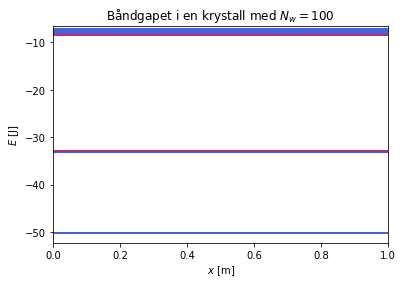

In [23]:
plt.figure("Band gap")
for i in range(300):
    plt.axhline(y=eigen_values[i] / e, color='#4363d8')
plt.axhline(y=eigen_values[199] / e, color='#e6194B')
plt.axhline(y=eigen_values[200] / e, color='#e6194B')
plt.title("Båndgapet i en krystall med $N_w=100$")
plt.xlabel("$x$ [m]")
plt.ylabel("$E$ [J]")
plt.show()

**Oppgave 4d):** For å undersøke om bølgefunksjonene samsvarer med Blochs teorem om at $\psi_k(x)=\sin(kx)u_k(x)$ med $u_k(x+a)=u_k(x)$ så plotter vi enkelte av dem. Her er $a$ gitterkonstanten til det periodiske potensialet, slik at $V(x+na)=V(x)$, og $k$ er elektronets bølgetall. Vi antar først at $N_w=5$ og plotter de to første bølgefunksjonene:

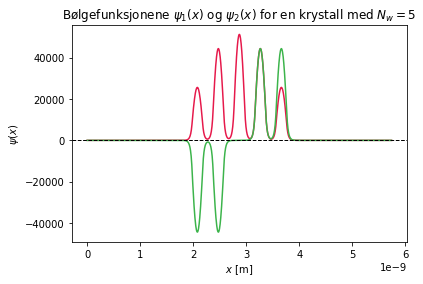

In [24]:
eigen_vectors, _, x, _ = crystal(5)
plt.figure("Blochs theorem with Nw = 5 and psi1 and psi2")
plt.plot(x, eigen_vectors[:,0], color='#e6194B')
plt.plot(x, eigen_vectors[:,1], color='#3cb44b')
plt.axhline(0, linewidth=1, color='k', linestyle='--')
plt.title("Bølgefunksjonene $\psi_1(x)$ og $\psi_2(x)$ for en krystall med $N_w=5$")
plt.xlabel("$x$ [m]")
plt.ylabel("$\psi(x)$")
plt.show()

Det er da enkelt å se at Blochs teorem stemmer for grunntilstanden i rød, da vi kan telle fem topper. Det er litt vanskeligere å se at det stemmer for første eksiterte tilstand da punktet i midten av brønnen er vanskelig å få med seg. Om vi tar med denne derimot er det klart at Blochs teorem også stemmer for første eksiterte tilstand. Vi kan da også se på den niende eksiterte tilstanden for $N_w=100$:

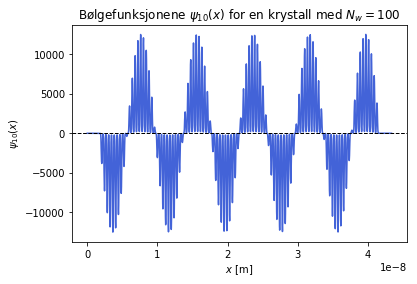

In [25]:
eigen_vectors, _, x, _ = crystal(100)
plt.figure("Blochs theorem with Nw = 100 and psi10")
plt.plot(x, eigen_vectors[:,9], color='#4363d8')
plt.axhline(0, linewidth=1, color='k', linestyle='--')
plt.title("Bølgefunksjonene $\psi_{10}(x)$ for en krystall med $N_w=100$")
plt.xlabel("$x$ [m]")
plt.ylabel("$\psi_{10}(x)$")
plt.show()

Fra dette plottet kan vi tilsvarede se at Blochs teorem om periodisiteten til bølgefunksjonen her med $N_w=100$ er oppfylt.

<a id='Referanser'></a>

## Referanser

Gjennom prosjektet er det brukt:
- Prosjektbeskrivelsen tiljengelig på BlackBoard.
- David J. Griffiths, *Introduction to Quantum Mechanics*, Pearson.
- Per Christian Hemmer *Kvantemekanikk*. Tapir Akademisk Forlag.

<a id='Kommentar'></a>

## Kommentar


Bra! Feil i oppgave 3, da det tilsynelatende kan se ut som at det har blitt avglemt at hvert energinivå kan fylles med to elektroner (spin opp/ned) både i atomer og molekyler.